In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('shopping_behavior_300k.csv')

In [3]:
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,150000.500000,44.080223,59.683433,3.750736,25.336633
std,86602.684716,15.200055,23.651967,0.715589,14.451086
min,1.000000,18.000000,20.000000,2.497511,1.000000
25%,75000.750000,31.000000,39.000000,3.100667,13.000000
50%,150000.500000,44.000000,60.000000,3.798435,25.000000
75%,225000.250000,57.000000,80.000000,4.399238,38.000000
max,300000.000000,70.000000,100.000000,5.002612,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer ID             300000 non-null  int64  
 1   Age                     300000 non-null  int64  
 2   Gender                  300000 non-null  object 
 3   Item Purchased          300000 non-null  object 
 4   Category                300000 non-null  object 
 5   Purchase Amount (USD)   300000 non-null  int64  
 6   Location                300000 non-null  object 
 7   Size                    300000 non-null  object 
 8   Color                   300000 non-null  object 
 9   Season                  300000 non-null  object 
 10  Review Rating           300000 non-null  float64
 11  Subscription Status     300000 non-null  object 
 12  Shipping Type           300000 non-null  object 
 13  Discount Applied        300000 non-null  object 
 14  Promo Code Used     

In [8]:
#Count how many customers are in each gender group.
df['Gender'].value_counts()

Gender
Male      198450
Female    101550
Name: count, dtype: int64

In [9]:
#Find the top 5 most purchased items.
df['Item Purchased'].value_counts().head()


Item Purchased
Pants      13182
Blouse     12994
Jewelry    12942
Shirt      12886
Dress      12632
Name: count, dtype: int64

In [10]:
#Get all the unique payment methods
df['Payment Method'].unique()


array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [11]:
#Filter rows where purchase price is above $50.
df[df['Purchase Amount (USD)'] > 50]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.100000,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.100000,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.100000,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.500000,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.200000,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299990,299991,52,Female,Dress,Footwear,88,Montana,M,Olive,Fall,3.699778,No,Standard,No,No,30,Venmo,Monthly
299991,299992,56,Female,Boots,Footwear,92,Rhode Island,M,Olive,Summer,3.100698,No,Next Day Air,No,No,2,Credit Card,Quarterly
299993,299994,58,Female,Sweater,Clothing,52,California,M,Green,Winter,4.900400,No,Standard,No,No,46,Venmo,Annually
299995,299996,35,Male,Shirt,Clothing,94,Illinois,M,Violet,Fall,4.198630,No,Free Shipping,No,No,31,PayPal,Annually


In [12]:
#Group customers by payment method and find total revenue.
df.groupby('Payment Method')['Purchase Amount (USD)'].sum()

Payment Method
Bank Transfer    2843532
Cash             3050737
Credit Card      3092224
Debit Card       2971205
PayPal           3061412
Venmo            2885920
Name: Purchase Amount (USD), dtype: int64

In [13]:
#Calculate the number of items purchased per category.
df['Category'].value_counts()

Category
Clothing       127963
Accessories     93477
Footwear        48726
Outerwear       29834
Name: count, dtype: int64

* Pie Plot

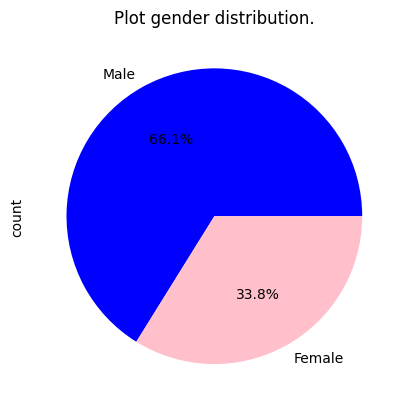

In [14]:
#Plot gender distribution.
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors =['blue','Pink'])
plt.title('Plot gender distribution.')
plt.show()

The visualization shows that the dataset is predominantly male, with 66.1% of respondents identifying as Male and 33.8% identifying as Female.

* Bar chart of top 5 purchased items.

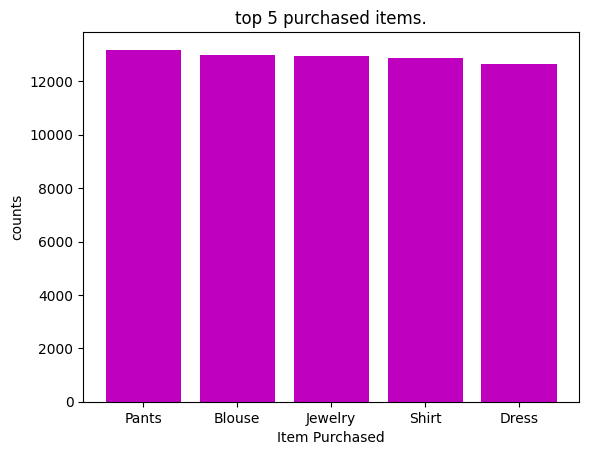

In [15]:
top_5 = df['Item Purchased'].value_counts().head()

plt.bar( top_5.index ,top_5.values, color = 'm')
plt.xlabel('Item Purchased')
plt.ylabel('counts')
plt.title('top 5 purchased items.')
plt.show()

This bar chart shows the top 5 most purchased items, with "Pants" being the most popular at 13,182 units, followed closely by blouses, jewelry, shirts, and dresses.

* Histogram of customer ages.

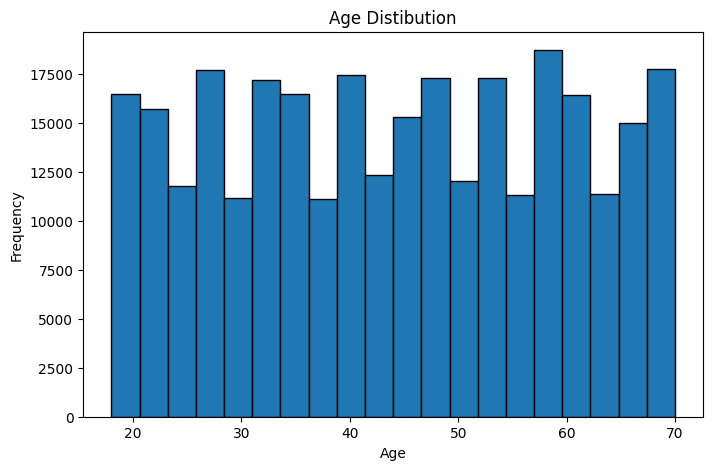

In [16]:
plt.figure(figsize = (8,5))

df['Age'].plot(kind = 'hist', bins = 20 , edgecolor = 'black')
plt.title("Age Distibution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* Bar chart: Revenue by category.

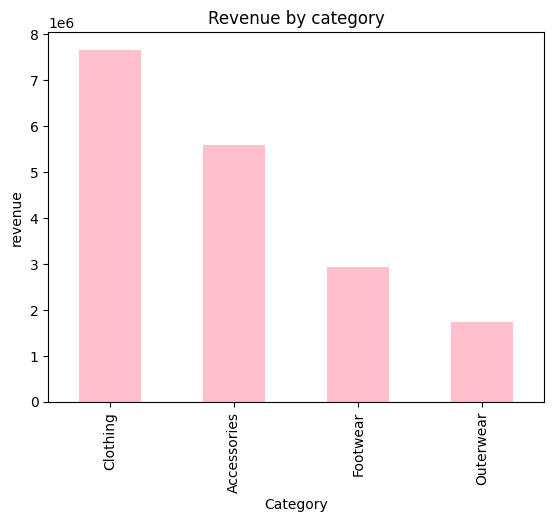

In [17]:
cat_revenue = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending = False)

cat_revenue.plot(kind = 'bar',color = 'pink')
plt.title('Revenue by category')
plt.ylabel('revenue')
plt.show()

* Find the top 10 customers who spent the most.

In [18]:
df.groupby('Customer ID')['Purchase Amount (USD)'].sum().nlargest(10)

Customer ID
43     100
96     100
194    100
205    100
244    100
249    100
456    100
519    100
582    100
616    100
Name: Purchase Amount (USD), dtype: int64

* Scatter plot - Age vs Spending Pattern

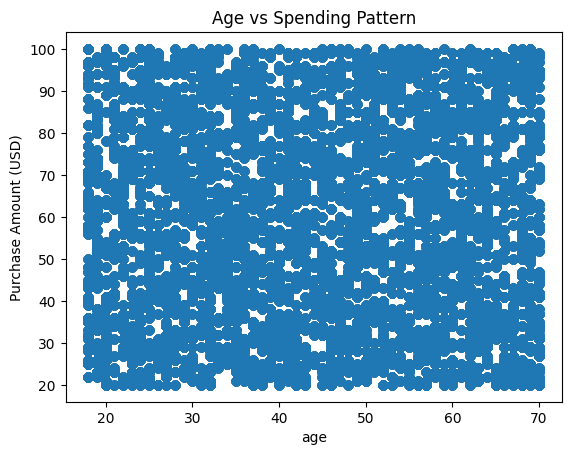

In [19]:
plt.scatter(df['Age'],df['Purchase Amount (USD)'])
plt.title('Age vs Spending Pattern')
plt.xlabel('age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

There is no co-relation between the age and amount spent

* Boxplot - Revenue Distribution by Gender

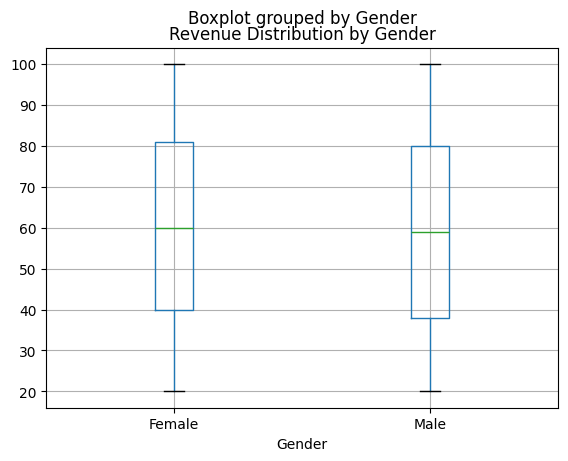

In [20]:
df.boxplot(column = 'Purchase Amount (USD)', by = 'Gender')
plt.title('Revenue Distribution by Gender')
plt.show()

Similar Spending Habits: Both genders show a nearly identical median purchase amount of approximately $60.

*Bar plot - Seasonal Sales Trend

In [21]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


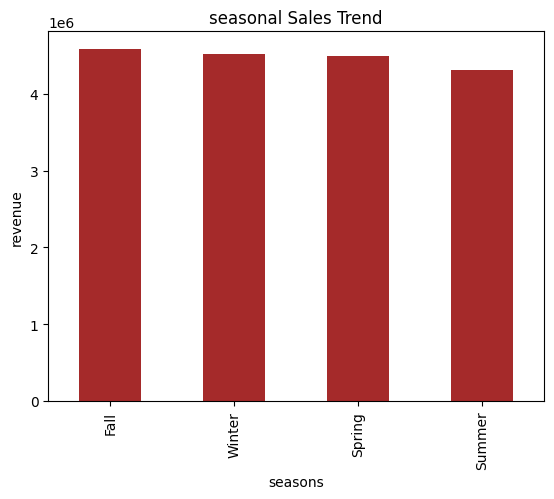

In [22]:
seasonal_revenue = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending = False)

seasonal_revenue.plot(kind = 'bar', color = 'brown')
plt.title('seasonal Sales Trend')
plt.xlabel('seasons')
plt.ylabel('revenue')
plt.show()

Revenue peaks in Fall ($4.58) and remains high through Winter ($4.51M) and Spring ($4.49M), with Summer ($4.30M) being the slowest but still highly productive season.

* Review Rating vs Purchase Amount

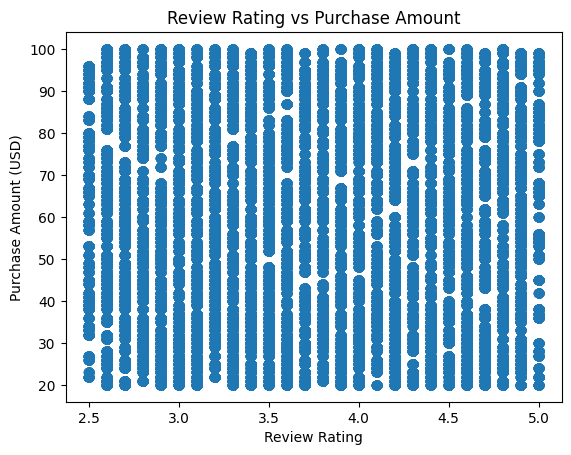

In [26]:
plt.scatter(df["Review Rating"],df["Purchase Amount (USD)"])
plt.title('Review Rating vs Purchase Amount')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.show()

The data points are spread fairly evenly across the entire grid. This indicates that there is no strong relationship between how much a customer spends and the rating they give.

* Shipping Type Performance

In [27]:
df.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly


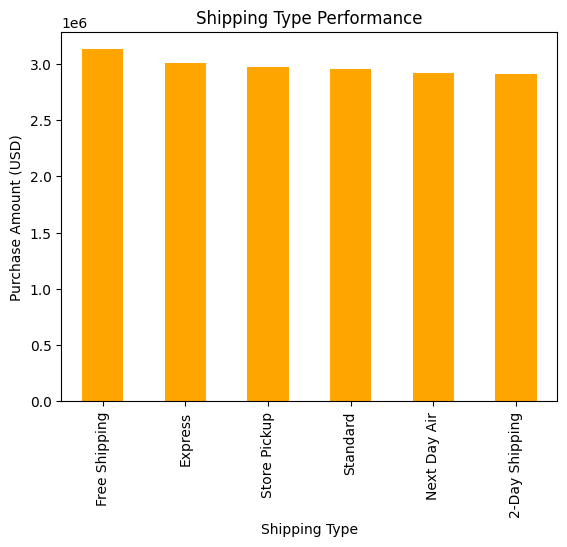

In [32]:
shipping_revenue = df.groupby("Shipping Type")["Purchase Amount (USD)"].sum().sort_values( ascending = False)

shipping_revenue.plot(kind = 'bar' , color = 'orange')
plt.title('Shipping Type Performance')
plt.ylabel('Purchase Amount (USD)')
plt.xlabel('Shipping Type')
plt.show()
          

Free Shipping is the top revenue generator at $3.13 million, though sales are remarkably well-distributed across all methods with each contributing at least $2.9 million.

* Top 10 Location vs Category Revenue Heatmap

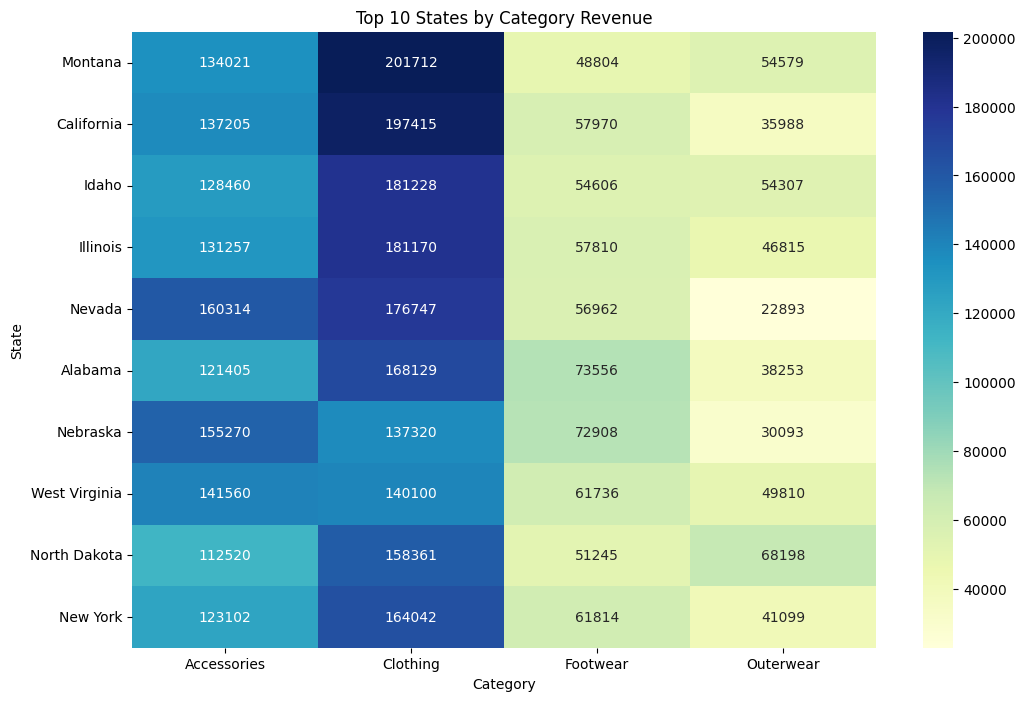

In [46]:
top_10 = df.groupby('Location')['Purchase Amount (USD)'].sum().nlargest(10).index

filtered_pivot = pivot_table.loc[top_10]
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Top 10 States by Category Revenue")
plt.ylabel("State")
plt.show()

Clothing Dominance: Clothing is the top-performing category in almost every state, with Montana reaching the highest peak at $201,712.

Accessories Strength: Accessories also show very strong performance, particularly in Nevada ($160,314) and Nebraska ($155,270).

Outerwear Lag: Across all ten states, Outerwear consistently generates the lowest revenue, often falling below $40,000 in states like California and Nebraska.

Top Overall State: Based on these four categories combined, Montana appears to be your most valuable market among the filtered group.

* Discount Dependency Analysis

In [49]:
discount_analysis = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()
print(discount_analysis)

Discount Applied
No     60.008555
Yes    59.264485
Name: Purchase Amount (USD), dtype: float64


* Customer Lifetime Value (CLV Proxy)

In [51]:
df['clv'] = df['Purchase Amount (USD)']*df['Previous Purchases']

In [52]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,clv
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,742
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,128
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1679
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,4410
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,1519


* Product Affinity(most frequently purchased item) by Category

In [57]:
item_affinity = (
    df.groupby (["Category", "Item Purchased"]).size().reset_index(name  = "count"))

print(item_affinity)

       Category Item Purchased  count
0   Accessories       Backpack   9561
1   Accessories           Belt  10978
2   Accessories         Blouse    664
3   Accessories          Boots    595
4   Accessories           Coat    641
..          ...            ...    ...
95    Outerwear       Sneakers    362
96    Outerwear          Socks    378
97    Outerwear     Sunglasses    407
98    Outerwear        Sweater    380
99    Outerwear        T-shirt    396

[100 rows x 3 columns]


* Previous Purchases vs Spending

In [59]:
corr = df["Previous Purchases"].corr(df["Purchase Amount (USD)"])
print(corr)

0.012531003131101929


* Above-Average Locations

In [64]:
loc_avg = df.groupby("Location")["Purchase Amount (USD)"].mean()
global_avg = df["Purchase Amount (USD)"].mean()
above_avg = loc_avg[loc_avg > global_avg]
print("Locations with Above-Average Spending:")
print(above_avg.sort_values(ascending=False))

Locations with Above-Average Spending:
Location
Alaska            66.945039
Arizona           66.072551
Pennsylvania      65.514072
West Virginia     63.328394
Nevada            63.197817
Virginia          62.789500
Washington        62.708494
North Dakota      62.133715
Utah              62.010574
Michigan          61.917200
New Mexico        61.906102
Arkansas          61.514874
Tennessee         61.500921
Rhode Island      60.954302
North Carolina    60.824992
Illinois          60.812482
Iowa              60.776804
Mississippi       60.568640
Wyoming           60.412675
Texas             60.381824
Massachusetts     60.319172
South Dakota      60.308534
New York          60.240463
Montana           60.119934
Ohio              59.815480
Idaho             59.800143
Name: Purchase Amount (USD), dtype: float64
